In [26]:
import pandas as pd
import numpy as np
from scipy import stats

In [27]:
data = pd.read_csv('delivery_time.csv')

In [28]:
data.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [29]:
data.tail()

,DeliveryTime,SortingTime
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [30]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [31]:
data.dtypes

DeliveryTime    float64
SortingTime       int64
dtype: object

In [32]:
data.shape

(21, 2)

In [33]:
data.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [34]:
data.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


<AxesSubplot:>

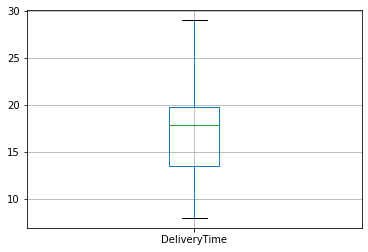

In [36]:
data.boxplot(['DeliveryTime'])

<AxesSubplot:>

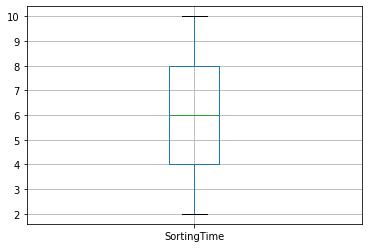

In [37]:
data.boxplot(['SortingTime'])

C:\Users\sharu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

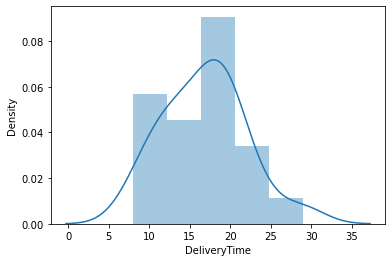

In [69]:
import seaborn as sns
sns.distplot(data['DeliveryTime'])

C:\Users\sharu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

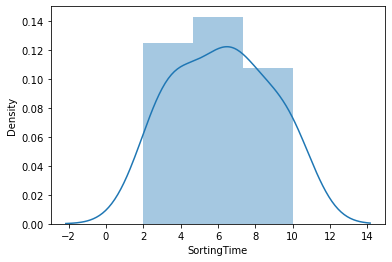

In [70]:
import seaborn as sns
sns.distplot(data['SortingTime'])

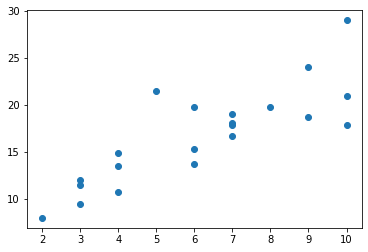

In [71]:
import matplotlib.pyplot as plt
plt.scatter(data.SortingTime, data.DeliveryTime)

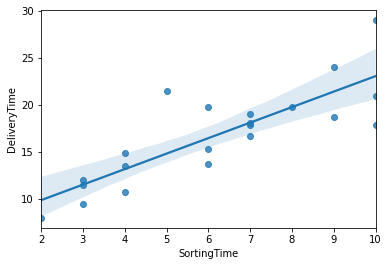

In [61]:
import statsmodels.formula.api as smf
model = smf.ols("DeliveryTime~SortingTime",data = data).fit()
sns.regplot (x="SortingTime", y="DeliveryTime", data=data);

In [63]:
#Coefficients
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [64]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues) 

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [65]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

##Predict for new data point

In [79]:
#Predict for 8.5 and 21.2   SortingTime circulation
newdata=pd.Series([8.5,21.2])

In [80]:
data_pred=pd.DataFrame(newdata,columns=['SortingTime'])

In [85]:
model.predict(data_pred)

0    20.599403
1    41.541956
dtype: float64